# SRGAN 활용하기
-----
### 프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기
### 프로젝트 2 : SRGAN을 이용해 고해상도 gif 생성하기

오늘은 인공지능이 활발하게 사용되는 기술 중 하나인 Super Resolution에 대해 살펴보고, 직접 활용해 보는 시간을 갖겠습니다. 많은 컴퓨터 비전 분야에서 딥러닝을 활용한 연구들이 좋은 결과를 기록하면서 오래전부터 많은 연구가 되어왔던 Super Resolution 분야 역시 딥러닝을 기반으로 큰 성장을 이루었고, 다양한 분야에서 활발하게 응용되고 있습니다.

## 용어정리
---

**✓ Super Resolution**이란?
>* 저해상도 영상을 고해상도 영상으로 변환하는 작업 또는 그러한 과정
>* "초해상화"라는 용어로도 사용
>* 고해상도 디스플레이의 발전에 따라 지금까지 많은 관심을 받아 옴
>* 하나의 저해상도 이미지를 고해상도 이미지로 만드는데 매우 다양한 경우의 수가 있다는 것은 Super Resolution이 가진 큰 특징
>* Single Image Super Resolution(SISR) : 하나의 이미지를 이용, 주로 연구!
>* Multi Image Super Resolution(MISR) : 여러 이미지를 이용
>* 참고자료
>>* [모니터의 핵심, 디스플레이의 스펙 따라잡기](http://blog.lgdisplay.com/2014/03/%eb%aa%a8%eb%8b%88%ed%84%b0-%ed%95%b5%ec%8b%ac-%eb%94%94%ec%8a%a4%ed%94%8c%eb%a0%88%ec%9d%b4%ec%9d%98-%ec%8a%a4%ed%8e%99-%eb%94%b0%eb%9d%bc%ec%9e%a1%ea%b8%b0-%ed%95%b4%ec%83%81%eb%8f%84/)
>>* [그림으로 쉽게 알아보는 HD 해상도의 차이](https://blog.lgdisplay.com/2014/07/%EA%B7%B8%EB%A6%BC%EC%9C%BC%EB%A1%9C-%EC%89%BD%EA%B2%8C-%EC%95%8C%EC%95%84%EB%B3%B4%EB%8A%94-hd-%ED%95%B4%EC%83%81%EB%8F%84%EC%9D%98-%EC%B0%A8%EC%9D%B4/)
>* 학습시키는 데 어렵게 만드는 요인들
>>1. 하나의 저해상도 이미지에 대해 여러 개의 고해상도 이미지가 나올 수 있다는 것(**`ill-posed (inverse) problem`**)
![ill-posed (inverse) problem](https://hoya012.github.io/assets/img/deep_learning_super_resolution/2.PNG)
>>2. 문제의 복잡도 : 원래 가진 이미지의 해상도 보다 더욱더 높은 해상도로 Super Resolution 할수록 점점 심해짐
>* 활용 사례
>>* [하얀거탑 리마스터링 제작기](http://tech.kobeta.com/%ED%95%98%EC%96%80%EA%B1%B0%ED%83%91-uhd-%EB%A6%AC%EB%A7%88%EC%8A%A4%ED%84%B0%EB%A7%81-%EC%A0%9C%EC%9E%91%EA%B8%B0/)



**✓ GAN**이란?
>* 참고자료
>>* [GAN - 스스로 학습하는 인공지능](https://www.samsungsds.com/kr/insights/Generative-adversarial-network-AI.html?referrer=https://aiffelstaticprd.blob.core.windows.net/)
>>* [GAN의 개념과 이해](https://www.samsungsds.com/kr/insights/Generative-adversarial-network-AI-2.html?referrer=https://aiffelstaticprd.blob.core.windows.net/)
>>* [10분안에 배우는 머신러닝 GAN 알고리즘 원리와 응용분야(Generative Adversarial Network 강의,GAN 설명)](https://www.youtube.com/watch?v=N9ewzLUZhL8&t=3s)

**✓ SRGAN = Super Resoultion + GAN**
>* 2016년 발표된 "Photo-Realistic Single Image **S**uper-**R**esolution Using a **G**enerative **A**dversarial **N**etwork" 논문에서 제안됨(4배수에 대해 실험을 수행)
![](https://hoya012.github.io/assets/img/deep_learning_super_resolution/13.PNG)
![](https://hoya012.github.io/assets/img/deep_learning_super_resolution/14.PNG)
>* 이미지를 복원하는 Generator network와, GT와 Generator의 output을 구분하는 Discriminator로 구성
>* 생성된 고해상도 이미지와 실제 고해상도 이미지를 VGG에 입력하여 모델 중간에서 추출해낸 특징을 비교해서 loss를 계산
>* GAN loss 뿐만 아니라 기존 MSE loss 대신 style transfer에서 사용하는 VGG loss도 같이 사용
>* VGG를 이용한 content loss 및 GAN을 사용함으로써 발생하는 adversarial loss를 합하여 최종적으로 perceptual loss라고 정의하며 이를 학습에 이용

### 프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기
---
앞서 사용했던 **`DIV2K`** 데이터셋은 bicubic interpolation을 이용해 가로 및 세로 픽셀 수를 1/4로 줄인 저해상도 이미지와 원래 고해상도 이미지 사이에서 학습되었습니다. 이 데이터셋으로 학습된 SRGAN를 이용해 좋은 결과를 얻기 위해서는 위와 같은 과정이 동일하게 진행되는 것이 좋습니다.

아래와 같이 두 가지 다른 단계를 거쳐서 직접 고른 이미지에 대해 SRGAN을 적용해 봅시다. (모델 학습을 진행하는 건 아닙니다❗) 테스트할 이미지를 고를 때, **`DIV2K`** 의 학습 데이터셋과 비슷한 종류의 이미지가 좋습니다. 일반적으로 자연, 동물, 건물 등의 이미지가 학습에 사용되었으며, 이와 달리 애니메이션 등의 이미지는 고해상도로 잘 변환되지 않을 수 있습니다.

특정 데이터셋에서만 학습되었기 때문에, 일반적으로 좋지 않은 결과가 나올 가능성이 높습니다. 결과와 상관없이 아래 과정만 잘 수행해봅시다.

**프로젝트 1-1.**

1. (적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.
2. 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다. cv2.resize()를 사용해 봅시다.
3. 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.
4. 2.의 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. 마찬가지로 cv2.resize()를 사용해 봅시다.
5. 3개 이미지(4.의 Bicubic의 결과, 3.의 SRGAN의 결과, 1.의 원래 고해상도 이미지)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.
6. 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

**프로젝트 1-2.**

1. (적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.
2. 불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 **apply_srgan** 함수를 사용하면 쉽습니다.
3. 1.에서 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. **cv2.resize()**를 사용해 봅시다.
4. 2개 이미지(3.의 Bicubic의 결과, 2.의 SRGAN의 결과)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.
5. 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

from tensorflow.keras import Input, Model
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from tensorflow.python.keras import applications
from skimage import data

Duplicate key in file PosixPath('/home/aiffel-dj49/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family: NanumGothic')


#### div2k 데이터를 불러옵니다.

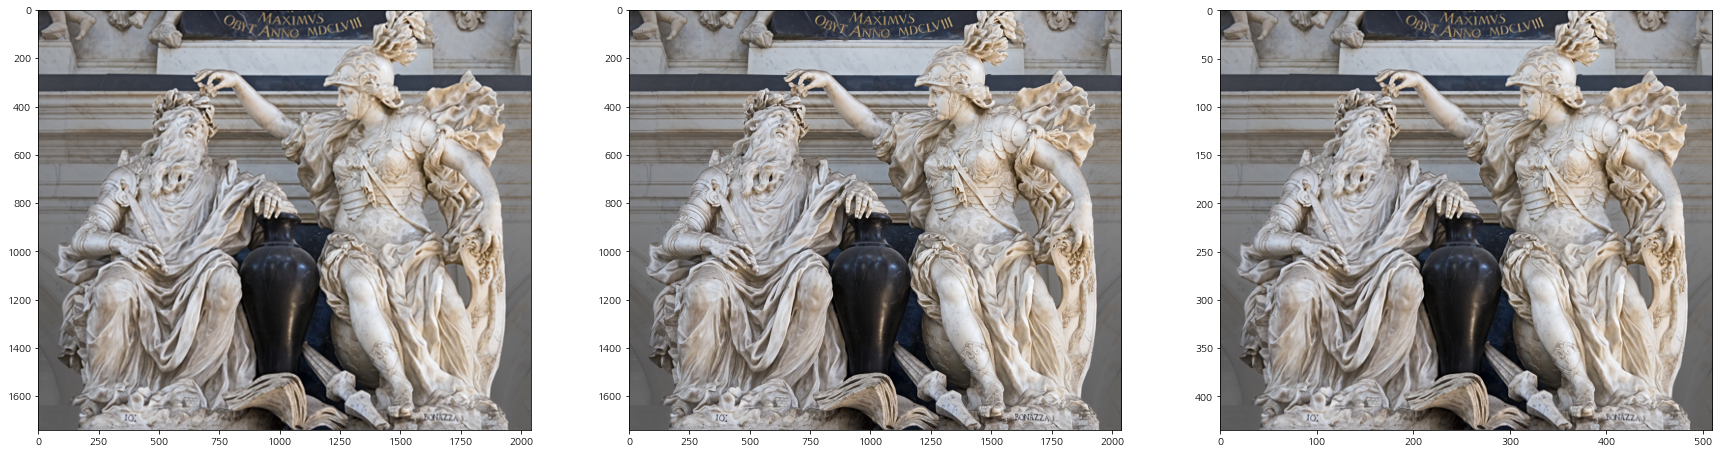

In [2]:
# 데이터를 불러옵니다.
train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],
    as_supervised=True
)
# 시각화를 위해 한 개의 데이터만 선택합니다.
for i, (lr, hr) in enumerate(valid):
    if i == 6: break    
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation 합니다.  
hr, lr = np.array(hr), np.array(lr)
bicubic_hr = cv2.resize(
    lr, 
    dsize=(hr.shape[1], hr.shape[0]), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic 설정
)
# 저해상도 및 고해상도 이미지를 시각화합니다.
plt.figure(figsize=(30,10))
plt.subplot(1,3,1); plt.imshow(bicubic_hr)
plt.subplot(1,3,2); plt.imshow(hr)
plt.subplot(1,3,3); plt.imshow(lr)

Text(0.5, 1.0, 'HR')

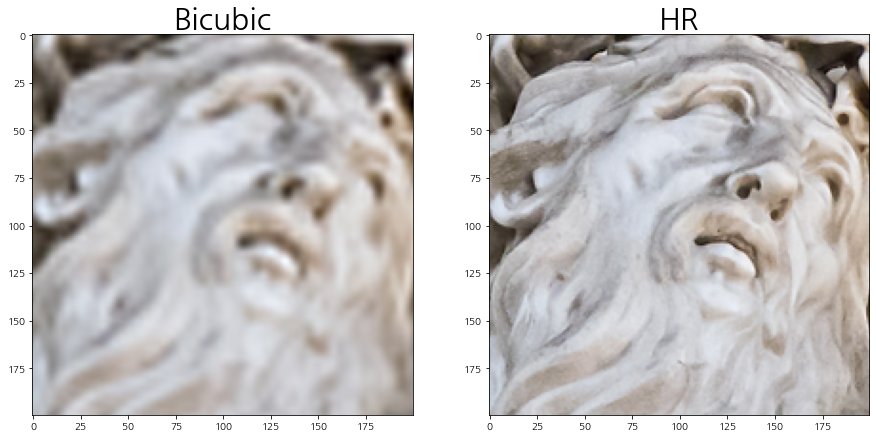

In [3]:
# 이미지의 특정 부분을 잘라내는 함수를 정의합니다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# interpolation된 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (400, 500)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_hr = crop(hr, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,2,1); plt.imshow(crop_bicubic_hr); plt.title("Bicubic", fontsize=30)
plt.subplot(1,2,2); plt.imshow(crop_hr); plt.title("HR", fontsize=30)

In [4]:
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [5]:
for i, (lr, hr) in enumerate(valid):
    if i == 6: break
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation 합니다.  
hr, lr = np.array(hr), np.array(lr)
bicubic_hr = cv2.resize(
    lr, 
    dsize=(hr.shape[1], hr.shape[0]), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic 설정
)

def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# interpolation된 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (400, 500)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_hr = crop(hr, left_top)

In [6]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],
    as_supervised=True
)

for i, (lr, hr) in enumerate(valid):
    if i == 6: break

srgan_hr = apply_srgan(lr)
print("✅")

✅


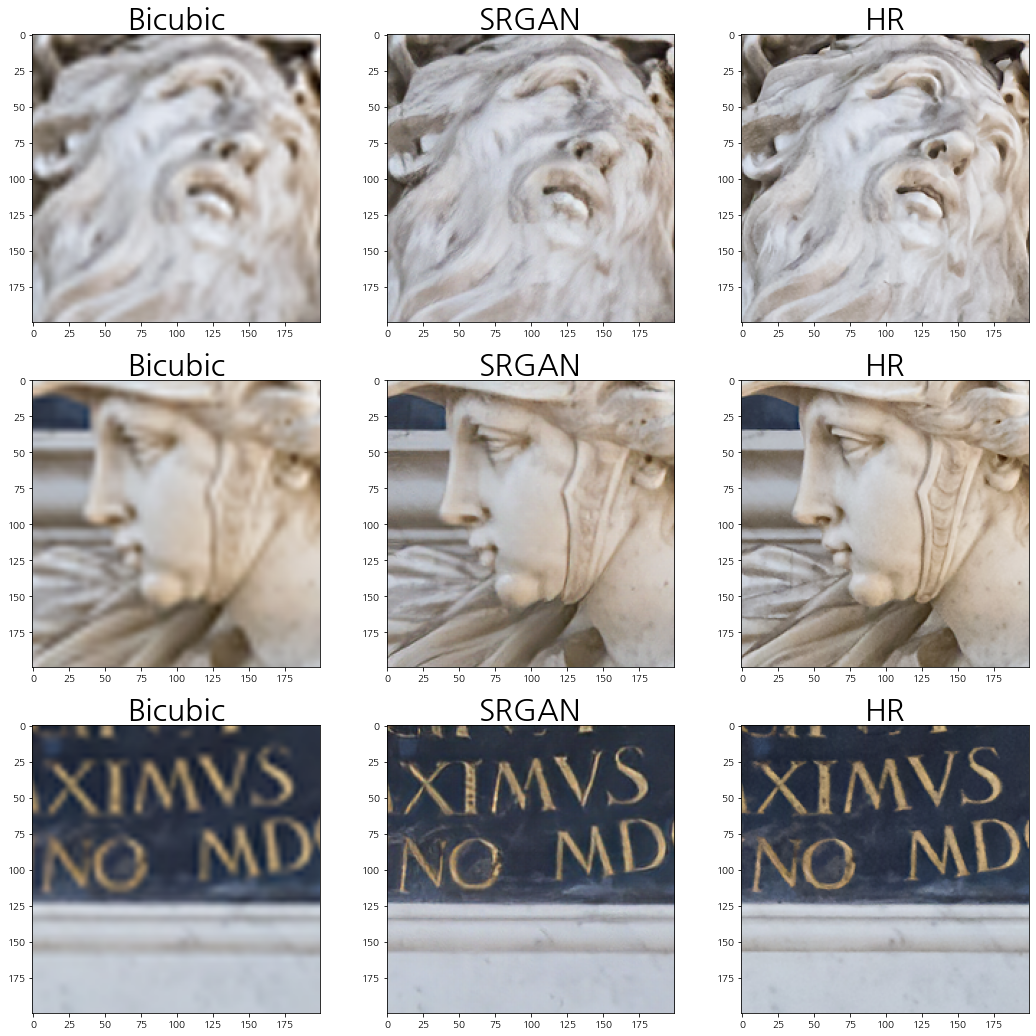

In [7]:
# SRGAN 시각화
# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops = [(400,500), (300,1200), (0,1000)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_hr, left_top, 200, 200)
    img2 = crop(srgan_hr , left_top, 200, 200)
    img3 = crop(hr, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRGAN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

(300, 451, 3)


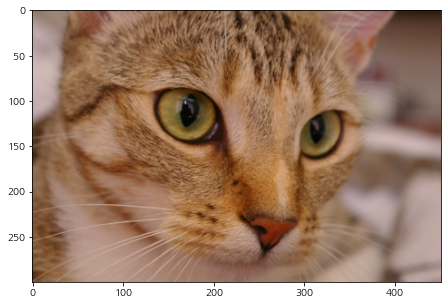

In [8]:
hr_cat = data.chelsea() # skimage에서 제공하는 예제 이미지를 불러옵니다.
hr_shape = hr_cat.shape[:2]

print(hr_cat.shape) # 이미지의 크기를 출력합니다.

plt.figure(figsize=(8,5))
plt.imshow(hr_cat)

/home/aiffel-dj49/anaconda3/envs/aiffel/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


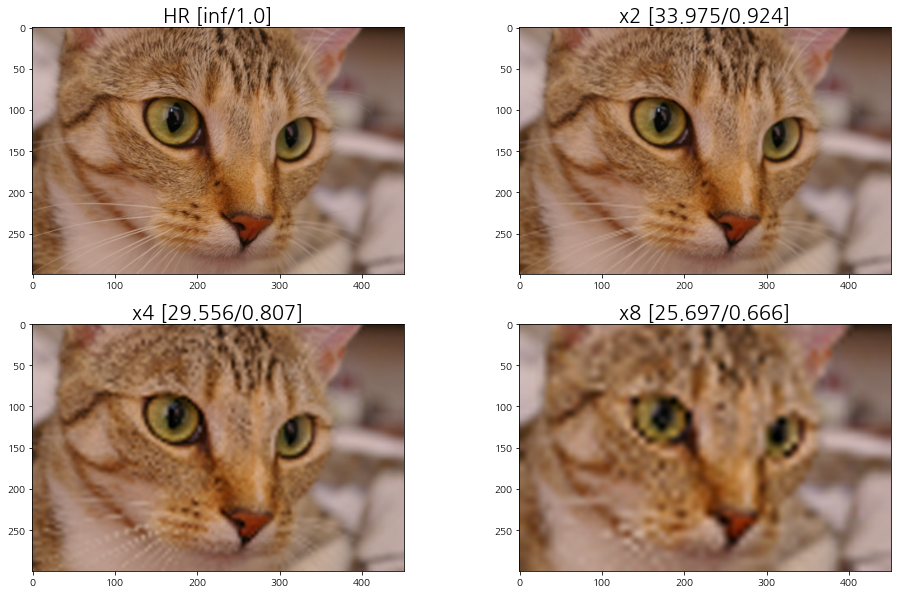

In [9]:
# 점수 시각화
# import cv2

# 이미지를 특정 크기로 줄이고 다시 늘리는 과정을 함수로 정의합니다.
def interpolation_xn(image, n):
    downsample = cv2.resize(
        image,
        dsize=(hr_shape[1]//n, hr_shape[0]//n)
    )
    upsample = cv2.resize(
        downsample,
        dsize=(hr_shape[1], hr_shape[0]),
        interpolation=cv2.INTER_CUBIC
    )
    return upsample

lr2_cat = interpolation_xn(hr_cat, 2) # 1/2로 줄이고 다시 복원
lr4_cat = interpolation_xn(hr_cat, 4) # 1/4로 줄이고 다시 복원
lr8_cat = interpolation_xn(hr_cat, 8) # 1/8로 줄이고 다시 복원

images = [hr_cat, lr2_cat, lr4_cat, lr8_cat]
titles = ["HR", "x2", "x4", "x8"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(hr_cat, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(hr_cat, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 합니다. 
plt.figure(figsize=(16,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)

NameError: name 'apply_srcnn' is not defined

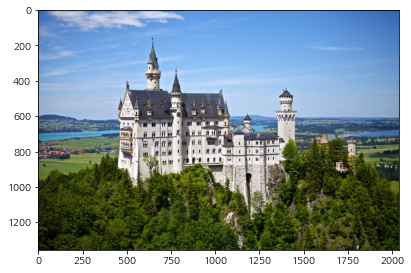

In [10]:
for i, (lr, hr) in enumerate(valid):
    if i == 24: break
        
lr_img, hr_img = np.array(lr), np.array(hr)
bicubic_img = cv2.resize(
    lr_img,
    (hr.shape[1], hr.shape[0]),
    interpolation=cv2.INTER_CUBIC
)

plt.figure(figsize=(20,15))
plt.subplot(311); plt.imshow(hr_img)

srcnn_img = apply_srcnn(bicubic_img)
srgan_img = apply_srgan(lr_img)

images = [bicubic_img, srcnn_img, srgan_img, hr_img]
titles = ["Bicubic", "SRCNN", "SRGAN", "HR"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(hr_img, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(hr_img, i, multichannel=True), 3) for i in images]

# 이미지 제목에 PSNR과 SSIM을 포함하여 시각화 합니다. 
plt.figure(figsize=(18,13))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=30)

In [11]:
left_top = (620, 570)
crop_images = [crop(i, left_top, 150, 250) for i in images]

psnr = [round(peak_signal_noise_ratio(crop_images[-1], i), 3) for i in crop_images]
ssim = [round(structural_similarity(crop_images[-1], i, multichannel=True), 3) for i in crop_images]

plt.figure(figsize=(18,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(crop_images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=30)

ValueError: zero-size array to reduction operation minimum which has no identity

### 프로젝트 2 : SRGAN을 이용해 고해상도 gif 생성하기
---
이전 Super Resolution의 활용 사례에 대해 살펴봤을 때, 단일 이미지가 아닌 영상에 대해 Super Resolution을 적용한 사례가 있었습니다. 이번에는 이미 학습된 SRGAN을 이용해 저해상도 영상을 고해상도 영상으로 바꿔보는 프로젝트를 수행해 봅시다.

실제로 동영상의 Super Resolution은 시간 순서에 따른 다수의 프레임 정보를 고려하는 것이 더 좋지만, 처음부터 학습시키기에 많은 시간이 소요됩니다. 여기서는 이전에 사용했던 SRGAN을 이용해 한 프레임씩 고해상도 이미지로 변환 시켜 모든 프레임에 대해 적용하고, 그 프레임들을 합쳐 동영상으로 만들어 봅시다.

각 프레임들을 모아 gif 파일을 만드는데 아래 라이브러리의 설치가 필요합니다.

> $ pip install imageio

## 순서
> **Step1.**  gif 파일 불러오기<br>
**Step2.** 프레임별 Super Resolution 진행하기<br>
**Step3.** 프레임을 합쳐 gif 만들기<br>
**Step4.** Jupyter notebook에 gif 표시하기<br>

### Step1. gif 파일 불러오기
---
아래 주소에 몇 개의 gif 파일이 있습니다. 이 중 하나를 골라 다운 로드하여 아래 과정을 수행합시다. (한 개 이상의 gif 파일에 대해 아래 과정을 수행해야 합니다!)

[GIF files](https://drive.google.com/drive/folders/1OLsa4btdwNUiVJcOJgZe_C6-lwEoNr4e)

다운받은 gif 파일을 아래와 같은 과정을 통해 각 프레임(이미지)을 불러올 수 있습니다. **`frames`**이란 리스트 안에 각각의 프레임이 들어 있습니다.

In [ ]:
import cv2

다운받은 파일의 경로를 설정해 주세요.
gif_path = os.getenv("HOME")+'/aiffel/super_resolution/'
gif = cv2.VideoCapture("wine_lr.gif")

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames), '개')
print("frame 크기 :", (frames[0].shape), '개')

### Step2. 프레임별 Super Resolution 진행하기
---
Bicubic interpolation과 SRGAN을 이용해 각각의 가로, 세로 픽셀 수를 4배로 늘려봅시다. Super Resolution이 완료된 각각의 결과를 **`frames_sr`**이라는 리스트에 넣어주세요.

In [ ]:
import imageio
from IPython.display import Image as show_gif

imageio.mimsave("저해상도.gif", frames)
show_gif("저해상도.gif", width=800)

### Step3. 프레임을 합쳐 gif 만들기
---
위에서 **`frame_sr`**을 만들었다면 아래 코드와 같이 gif 파일을 생성할 수 있습니다. Bicubic 및 SRGAN의 결과를 각각 저장하여 2개 파일을 만들어 주세요.

In [ ]:
imageio.mimsave("고해상도.gif", frames_sr)

### Step4. Jupyter notebook에 gif 표시하기
---
아래와 같이 다운받은 저해상도 gif 파일과 고해상도 gif 파일을 각각 jupyter 내에 출력하여 최종 제출해 주시면 됩니다. jupyter 내에 출력이 어려운 경우, GitHub에 저해상도, 고해상도 gif파일을 업로드 후 링크를 첨부해주시기바랍니다. Super Resolution이 잘 적용되었는지 시각적으로 확인하기 위해 아래의 width 옵션을 적당히 크게 해주세요. 저해상도 및 고해상도 시각화의 width 값은 같도록 설정해주세요.

In [ ]:
show_gif("**저해상도**.gif", width=800)  # width 는 적당히 큰 값으로 설정해주세요<br>
show_gif("**고해상도**.gif", width=800)  # 위에서 설정한 width와 같은 값으로 설정해주세요

# 루브릭 평가 기준
---
번호|평가문항|상세기준
---|---|---
1 |SRGAN을 이용해 고해상도의 이미지를 생성하였다.|SRGAN을 통해 생성된 이미지를 제출하였다.
2 |다양한 해상도의 이미지에 대해 시각화를 통해 원본, SRGAN생성본, interpolation생성본을 비교분석하였다.|이미지의 특성과 super resolution 방법을 관련지어 생성 결과를 체계적으로 분석하였다.
3 |저해상도 gif 동영상을 고해상도 동영상으로 성공적으로 변환하였다.|저해상도 원본 gif와 생성된 고해상도 gif의 해상도 차이가 시각적으로 확인 가능하다.

# 회고
---